# Midiendo rendimiento y riesgo con datos históricos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/7d/Copper_Price_History_USD.png" width="600px" height="400px" />

> Ya sabemos que podemos caracterizar la distribución de rendimientos de un activo mediante una medida de tendencia central (media: rendimiento esperado) y una medida de dispersión (desviación estándar: volatilidad). 

> En la clase pasada vimos como obtener reportes históricos de precios de activos. ¿Cómo usamos estos históricos para medir el rendimiento esperado y la volatilidad de los rendimientos?

*Objetivos:*
- Calcular los rendimientos a partir de históricos de precios.
- Estimar rendimiento esperado y riesgo a partir de históricos de rendimientos.
- Anualizar rendimiento y volatilidad cuando los datos están en una base de tiempo menor.
- Verificar la relación entre rendimiento y riesgo a través de datos reales.

**Referencias:**
- http://pandas.pydata.org/
- https://pandas-datareader.readthedocs.io/en/latest/
- Notas del curso "Portfolio Selection and Risk Management", Rice University, disponible en Coursera.
___

## 1. Cálculo de los rendimientos

Muy bien, ya entonces sabemos descargar históricos de precios...

**Ejemplo:** trabajaremos esta clase con activos que se encuentran en el top-10 del índice S&P500. Descargar precios ajustados en el cierre de Microsoft (MSFT), Apple (AAPL), Amazon (AMZN), Facebook (FB) y Alphabet Inc. (GOOGL) desde el primero de enero del 2015 hasta hoy.

In [1]:
# Importar paquetes
import pandas_datareader.data as web
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [3]:
# Información
tickers = ["MSFT", "AAPL", "AMZN", "META", "GOOGL"]
start = "2015-01-01"

In [4]:
# Precios diarios ajustados en el cierre
closes = get_adj_closes(tickers=tickers, start_date=start)

In [5]:
closes.head()

Symbols,MSFT,AAPL,AMZN,META,GOOGL
Date,,,,,
2015-01-02,40.926437,24.644018,15.4260,78.449997,26.477501
2015-01-05,40.550091,23.949764,15.1095,77.190002,25.973000
2015-01-06,39.954929,23.952007,14.7645,76.150002,25.332001
2015-01-07,40.462559,24.287872,14.9210,76.150002,25.257500
2015-01-08,41.652897,25.221066,15.0230,78.180000,25.345501


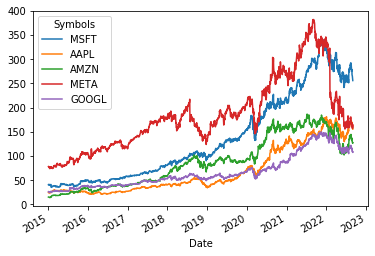

In [6]:
# Gráfico de histórico de precios diarios
closes.plot()

### 1.1. Rendimientos porcentuales

Muy bien, pero para el análisis no trabajamos con los precios sino con los rendimientos... **¿porqué?**

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

*¡Cuidado!* los rendimientos son de acuerdo a la base de tiempo en que se reportan los precios. Por ejemplo: 
- si los precios se reportan en una base diaria, los rendimientos también son diarios;
- si los precios se reportan en una base mensual, los rendimientos también son mensuales.

In [8]:
# S_t
closes.head()

Symbols,MSFT,AAPL,AMZN,META,GOOGL
Date,,,,,
2015-01-02,40.926445,24.644016,15.4260,78.449997,26.477501
2015-01-05,40.550083,23.949759,15.1095,77.190002,25.973000
2015-01-06,39.954937,23.952009,14.7645,76.150002,25.332001
2015-01-07,40.462570,24.287867,14.9210,76.150002,25.257500
2015-01-08,41.652893,25.221066,15.0230,78.180000,25.345501


In [10]:
# S_{t-1}
closes.shift().head()

Symbols,MSFT,AAPL,AMZN,META,GOOGL
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,40.926445,24.644016,15.4260,78.449997,26.477501
2015-01-06,40.550083,23.949759,15.1095,77.190002,25.973000
2015-01-07,39.954937,23.952009,14.7645,76.150002,25.332001
2015-01-08,40.462570,24.287867,14.9210,76.150002,25.257500


In [13]:
# Calcular rendimientos
ret = ((closes - closes.shift()) / closes.shift()).dropna()
ret.head()

Symbols,MSFT,AAPL,AMZN,META,GOOGL
Date,,,,,
2015-01-05,-0.009196,-0.028171,-0.020517,-0.016061,-0.019054
2015-01-06,-0.014677,0.000094,-0.022833,-0.013473,-0.024679
2015-01-07,0.012705,0.014022,0.010600,0.000000,-0.002941
2015-01-08,0.029418,0.038422,0.006836,0.026658,0.003484
2015-01-09,-0.008405,0.001073,-0.011749,-0.005628,-0.012211


In [7]:
ret = closes.pct_change().dropna()
ret

Symbols,MSFT,AAPL,AMZN,META,GOOGL
Date,,,,,
2015-01-05,-0.009196,-0.028171,-0.020517,-0.016061,-0.019054
2015-01-06,-0.014677,0.000094,-0.022833,-0.013473,-0.024679
2015-01-07,0.012705,0.014022,0.010600,0.000000,-0.002941
2015-01-08,0.029418,0.038422,0.006836,0.026658,0.003484
2015-01-09,-0.008405,0.001073,-0.011749,-0.005628,-0.012211
...,...,...,...,...,...
2022-08-29,-0.010668,-0.013690,-0.007342,-0.016133,-0.008338
2022-08-30,-0.008521,-0.015305,-0.008167,-0.012628,-0.004387
2022-08-31,-0.005704,-0.010635,-0.015226,0.036714,-0.006609


`NaN`: Not A Number

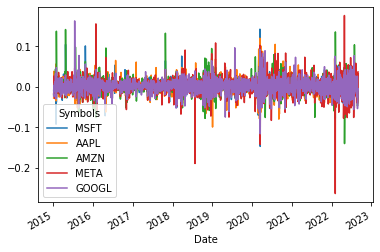

In [15]:
# Graficar...
ret.plot()

**¿Qué se observa respecto a los precios?**

Respuestas:
- Los rendimientos parecen conservar tendecias estadísticas constantes (por ejemplo, oscilan al rededor de números cercanos a cero). 

### 1.2. Rendimientos logarítmicos (log-rendimientos)

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

<font color=blue>Ver en el tablero</font> que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

In [16]:
log_ret = np.log(closes / closes.shift()).dropna()

In [17]:
# Recordar rendimientos porcentuales. Ver que son similares
ret.head(3)

Symbols,MSFT,AAPL,AMZN,META,GOOGL
Date,,,,,
2015-01-05,-0.009196,-0.028171,-0.020517,-0.016061,-0.019054
2015-01-06,-0.014677,0.000094,-0.022833,-0.013473,-0.024679
2015-01-07,0.012705,0.014022,0.010600,0.000000,-0.002941


In [19]:
# Veamos el valor absoluto de la diferencia
log_ret.head(3)

Symbols,MSFT,AAPL,AMZN,META,GOOGL
Date,,,,,
2015-01-05,-0.009239,-0.028576,-0.020731,-0.016191,-0.019238
2015-01-06,-0.014786,0.000094,-0.023098,-0.013565,-0.024989
2015-01-07,0.012625,0.013925,0.010544,0.000000,-0.002945


In [20]:
ret - log_ret

Symbols,MSFT,AAPL,AMZN,META,GOOGL
Date,,,,,
2015-01-05,0.000043,4.044290e-04,0.000213,0.000130,0.000184
2015-01-06,0.000109,4.415346e-09,0.000265,0.000092,0.000310
2015-01-07,0.000080,9.740015e-05,0.000056,0.000000,0.000004
2015-01-08,0.000424,7.197628e-04,0.000023,0.000349,0.000006
2015-01-09,0.000036,5.748974e-07,0.000070,0.000016,0.000075
...,...,...,...,...,...
2022-08-25,0.000061,1.102480e-04,0.000332,0.000559,0.000333
2022-08-26,0.000764,7.289973e-04,0.001169,0.000885,0.001518
2022-08-29,0.000057,9.457493e-05,0.000027,0.000132,0.000035


Por lo anterior, muchas veces se usan para el análisis los rendimientos continuamente compuestos.
___

## 2. Caracterización de la distribución de los rendimientos

Entonces:
- partimos de que tenemos los rendimientos porcentuales diarios de Microsoft (MSFT), Apple (AAPL), Amazon (AMZN), Facebook (FB) y Alphabet Inc. (GOOGL) desde inicios del 2011 a finales del 2015;
- ¿cómo resumirían estos datos?

In [21]:
# Rendimiento medio diario (media aritmética)
ret.mean()

Symbols
MSFT     0.001113
AAPL     0.001133
AMZN     0.001301
META     0.000633
GOOGL    0.000882
dtype: float64

In [22]:
# Volatilidad diaria (desviación estándar)
ret.std()

Symbols
MSFT     0.017414
AAPL     0.018559
AMZN     0.020501
META     0.022331
GOOGL    0.017441
dtype: float64

In [24]:
# Podemos resumir en un DataFrame
summary = pd.DataFrame({
    'media': ret.mean(),
    'volatilidad': ret.std()
}).T
summary

Symbols,MSFT,AAPL,AMZN,META,GOOGL
media,0.001113,0.001133,0.001301,0.000633,0.000882
volatilidad,0.017414,0.018559,0.020501,0.022331,0.017441


Normalmente se reportan rendimientos esperados y volatilidades en una base anual. Para anualizar:

$$E[r_a]=12E[r_m]=252E[r_d]=52E[r_w],\text{ y}$$

$$\sigma_{r_a}=\sqrt{12}\sigma_{r_m}=\sqrt{252}\sigma_{r_d}=\sqrt{52}\sigma_{r_w}$$

In [8]:
# Resumen en base anual
summary = pd.DataFrame({
    'media': ret.mean() * 252,
    'volatilidad': ret.std() * np.sqrt(252)
}).T
summary

Symbols,MSFT,AAPL,AMZN,META,GOOGL
media,0.277568,0.284172,0.328375,0.157227,0.221506
volatilidad,0.276379,0.294507,0.325288,0.354532,0.276843


In [9]:
from matplotlib import pyplot as plt

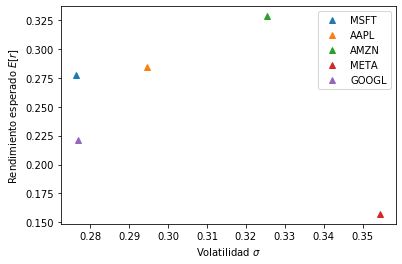

In [10]:
# Gráfico rendimiento esperado vs. volatilidad
for ticker in summary:
    plt.plot(
        summary.loc["volatilidad", ticker],
        summary.loc["media", ticker],
        '^',
        label=ticker
    )
plt.xlabel("Volatilidad $\sigma$")
plt.ylabel("Rendimiento esperado $E[r]$")
plt.legend()

### 2.1 Ajuste de curvas con mínimos cuadrados
Consideramos que tenemos un conjunto de n pares ordenados de datos $(\sigma_{r_i},E[r_i])$, para $i=1,2,3,\dots,n$... **en este caso corresponden a volatilidad y rendimiento esperado**

#### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(\sigma) = \beta_0+\beta_1 \sigma = \left[1 \quad \sigma\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad \sigma\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $\sigma_{r_i}$ ($\hat{f}(\sigma_{r_i})$) aproxime los valores correspondientes $E[r_i]$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(E[r_i]-\hat{f}(\sigma_{r_i}))^2$$

In [11]:
# Importar el módulo optimize de la librería scipy
from scipy import optimize as opt

In [12]:
# Funcion minimize
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [106]:
# Funcion objetivo y condicion inicial
def mse(beta, x, y):
    recta = beta[0] + beta[1] * x
    error = recta - y
    return (error**2).mean()

In [107]:
summary_ = summary.iloc[:, [0, 1, 2, 4]]
summary_

Symbols,MSFT,AAPL,AMZN,GOOGL
media,0.277568,0.284172,0.328375,0.221506
volatilidad,0.276379,0.294507,0.325288,0.276843


In [117]:
# Resolver problema de optimizacion
solucion = opt.minimize(
    fun=mse,
    x0=[0, 0],
    args=(summary_.loc['volatilidad'],  # x 
          summary_.loc['media'])  # y
)

In [118]:
solucion

      fun: 0.00040946521272421777
 hess_inv: array([[ 109.23205533, -370.77709722],
       [-370.77709722, 1264.3525896 ]])
      jac: array([0.0000000e+00, 9.4587449e-11])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 4
     njev: 10
   status: 0
  success: True
        x: array([-0.1959211 ,  1.61575065])

In [119]:
beta = solucion.x

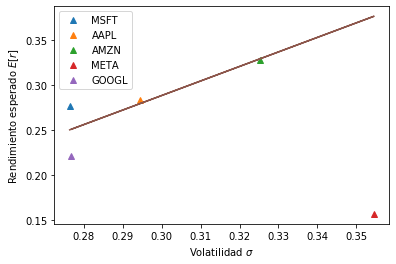

In [120]:
for ticker in summary:
    plt.plot(
        summary.loc["volatilidad", ticker],
        summary.loc["media", ticker],
        '^',
        label=ticker
    )
plt.plot(summary.loc["volatilidad"], 
         beta[0] + beta[1] * summary.loc["volatilidad"])
plt.xlabel("Volatilidad $\sigma$")
plt.ylabel("Rendimiento esperado $E[r]$")
plt.legend()

In [121]:
# Cálculo de bondad de ajuste através de R^2
recta = beta[0] + beta[1] * summary_.loc["volatilidad"]
error = recta - summary_.loc["media"]
Rsq = 1 - np.var(error) / np.var(summary_.loc["media"])
Rsq

0.7160171606700978

In [111]:
beta

array([-0.1959211 ,  1.61575065])

**¿Qué se puede concluir acerca de la relación entre riesgo (medido con la volatilidad) y el rendimiento esperado (medido con la media)?**

Respuestas:
- La pendiente de la recta es positiva, lo que confirma la relación positiva entre rendimiento esperado y riesgo.
- Si el mercado solo estuviera dado por los cuatro activos analizados (GOOGL, MSFT, AAPL, AMZN), la tasa libre de riesgo sería $-0.19$.
- Por cada unidad de riesgo (volatilidad), el rendimiento esperado aumenta $1.61$.

## 3. Comentarios finales acerca del uso de datos históricos.

### ¡Cuidado!
- Es cierto que los patrones que vemos sobre periodos largos de tiempo en diferentes tipos de intrumentos son muy robustos en términos de la relación rendimiento/riesgo (positiva).
- Por tanto, esperamos rendimientos más altos en el futuro cuando asumimos cierto riesgo.
- ¿Cómo encontramos ese 'rendimiento esperado'? Datos históricos (humanos: tendencia a generalizar)

- Entonces, la idea es que si los rendimientos esperados son un p.e. estacionario, el promedio de muchos rendimientos pasados es una buena estimación del rendimiento esperado futuro (Teorema del límite central).
- ¿Deberíamos pensarlo dos veces?

## SI

Problemas:
- La muestra de datos en el periodo específico de tiempo puede estar sesgada.
- Ventanas de tiempo más grandes reducen especificidad de la muestra y estimados más precisos.
 - Aún así, datos muy viejos pueden ser no representativos.
- Nuevos fondos o estrategias de inversión están a menudo sesgados positivamente:
 - reporte de resultados en tiempos voluntarios;
 - las que mueren (no funcionan), no se reportan;

# Anuncios parroquiales:
## 1. Fin Módulo 1. Revisar que se hayan cumplido los objetivos del módulo (Clase0)
## 2. Tarea: revisar archivo "Tarea3_MidiendoRendimientoRiesgo" en clase. Para el lunes 14 de febrero.
## 3. Recordar quiz la siguiente clase.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>